In [1]:
# Import library yang dibutuhkan
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Semesta

In [2]:
# Definisikan variabel fuzzy
KD = ctrl.Antecedent(np.arange(0, 100, 1), 'kemampuanDiri')
PD = ctrl.Antecedent(np.arange(0, 100, 1), 'pengembanganDiri')
KB = ctrl.Antecedent(np.arange(0, 100, 1), 'kepribadian')
kelayakan = ctrl.Consequent(np.arange(0, 100, 1), 'kelayakan')

## Fungsi Keanggotaan

In [3]:
# Pembentukan himpunan fuzzy
KD['kurang'] = fuzz.trapmf(KD.universe, [0, 0, 60, 75])
KD['cukup'] = fuzz.trimf(KD.universe, [60, 75, 90])
KD['baik'] = fuzz.trapmf(KD.universe, [75, 90, 100, 100])

C:\Users\anugr\anaconda3\envs\main-ds\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


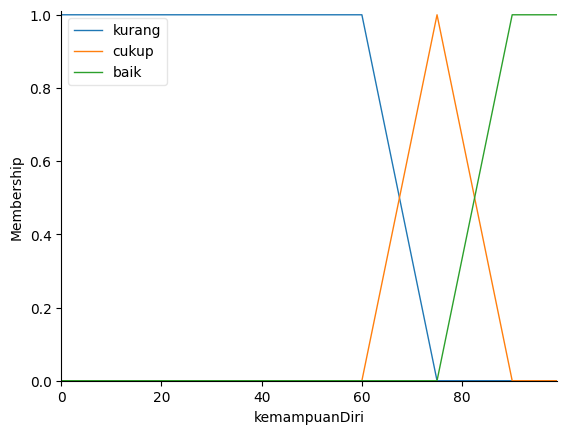

In [4]:
KD.view()

In [5]:
PD['kurang'] = fuzz.trapmf(PD.universe, [0, 0, 60, 75])
PD['cukup'] = fuzz.trimf(PD.universe, [60, 75, 90])
PD['baik'] = fuzz.trapmf(PD.universe, [75, 90, 100, 100])

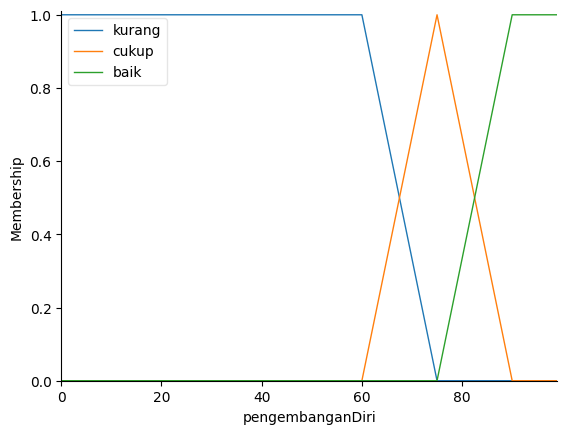

In [6]:
PD.view()

In [7]:
KB['kurang'] = fuzz.trapmf(KB.universe, [0, 0, 60, 75])
KB['cukup'] = fuzz.trimf(KB.universe, [60, 75, 90])
KB['baik'] = fuzz.trapmf(KB.universe, [75, 90, 100, 100])

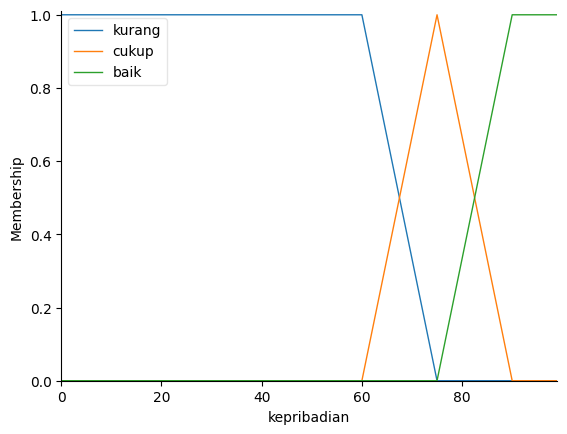

In [8]:
KB.view()

In [9]:
kelayakan['tidak_layak'] = fuzz.trapmf(kelayakan.universe, [0, 0, 60, 75])
kelayakan['cukup_layak'] = fuzz.trimf(kelayakan.universe, [60, 75, 90])
kelayakan['sangat_layak'] = fuzz.trapmf(kelayakan.universe, [75, 90, 100, 100])

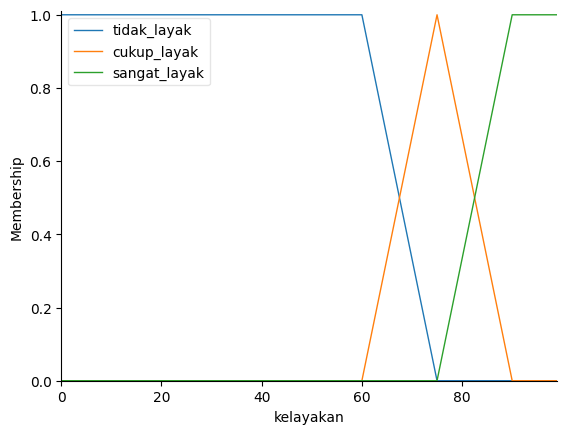

In [10]:
kelayakan.view()

In [11]:
# Pembentukan aturan fuzzy
rule1 = ctrl.Rule(KD['kurang'] & PD['kurang'] & KB['kurang'], kelayakan['tidak_layak'])
rule2 = ctrl.Rule(KD['kurang'] & PD['kurang'] & KB['cukup'], kelayakan['tidak_layak'])
rule3 = ctrl.Rule(KD['kurang'] & PD['kurang'] & KB['baik'], kelayakan['tidak_layak'])
rule4 = ctrl.Rule(KD['kurang'] & PD['cukup'] & KB['kurang'], kelayakan['tidak_layak'])
rule5 = ctrl.Rule(KD['kurang'] & PD['cukup'] & KB['cukup'], kelayakan['cukup_layak'])
rule6 = ctrl.Rule(KD['kurang'] & PD['cukup'] & KB['baik'], kelayakan['cukup_layak'])
rule7 = ctrl.Rule(KD['kurang'] & PD['baik'] & KB['kurang'], kelayakan['tidak_layak'])
rule8 = ctrl.Rule(KD['kurang'] & PD['baik'] & KB['cukup'], kelayakan['cukup_layak'])
rule9 = ctrl.Rule(KD['kurang'] & PD['baik'] & KB['baik'], kelayakan['tidak_layak'])

In [12]:
rule10 = ctrl.Rule(KD['cukup'] & PD['kurang'] & KB['kurang'], kelayakan['tidak_layak'])
rule11 = ctrl.Rule(KD['cukup'] & PD['kurang'] & KB['cukup'], kelayakan['cukup_layak'])
rule12 = ctrl.Rule(KD['cukup'] & PD['kurang'] & KB['baik'], kelayakan['cukup_layak'])
rule13 = ctrl.Rule(KD['cukup'] & PD['cukup'] & KB['kurang'], kelayakan['cukup_layak'])
rule14 = ctrl.Rule(KD['cukup'] & PD['cukup'] & KB['cukup'], kelayakan['cukup_layak'])
rule15 = ctrl.Rule(KD['cukup'] & PD['cukup'] & KB['baik'], kelayakan['cukup_layak'])
rule16 = ctrl.Rule(KD['cukup'] & PD['baik'] & KB['kurang'], kelayakan['cukup_layak'])
rule17 = ctrl.Rule(KD['cukup'] & PD['baik'] & KB['cukup'], kelayakan['cukup_layak'])
rule18 = ctrl.Rule(KD['cukup'] & PD['baik'] & KB['baik'], kelayakan['sangat_layak'])

In [13]:
rule19 = ctrl.Rule(KD['baik'] & PD['kurang'] & KB['kurang'], kelayakan['tidak_layak'])
rule20 = ctrl.Rule(KD['baik'] & PD['kurang'] & KB['cukup'], kelayakan['cukup_layak'])
rule21 = ctrl.Rule(KD['baik'] & PD['kurang'] & KB['baik'], kelayakan['sangat_layak'])
rule22 = ctrl.Rule(KD['baik'] & PD['cukup'] & KB['kurang'], kelayakan['cukup_layak'])
rule23 = ctrl.Rule(KD['baik'] & PD['cukup'] & KB['cukup'], kelayakan['cukup_layak'])
rule24 = ctrl.Rule(KD['baik'] & PD['cukup'] & KB['baik'], kelayakan['sangat_layak'])
rule25 = ctrl.Rule(KD['baik'] & PD['baik'] & KB['kurang'], kelayakan['sangat_layak'])
rule26 = ctrl.Rule(KD['baik'] & PD['baik'] & KB['cukup'], kelayakan['sangat_layak'])
rule27 = ctrl.Rule(KD['baik'] & PD['baik'] & KB['baik'], kelayakan['sangat_layak'])

## Define Rules

In [14]:
# Buat sistem kontrol fuzzy
kelayakan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, 
                                     rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, 
                                     rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])

In [15]:
# Buat simulasi sistem kontrol fuzzy
kelayakan_simulasi = ctrl.ControlSystemSimulation(kelayakan_ctrl)

## Defuzzyfikasi

In [16]:
# Masukkan nilai input
kelayakan_simulasi.input['kemampuanDiri'] = 80
kelayakan_simulasi.input['pengembanganDiri'] = 67
kelayakan_simulasi.input['kepribadian'] = 78

In [17]:
# Jalankan simulasi
kelayakan_simulasi.compute()

In [18]:
# Cetak hasil output
print(kelayakan_simulasi.output['kelayakan'])

77.84096385542173


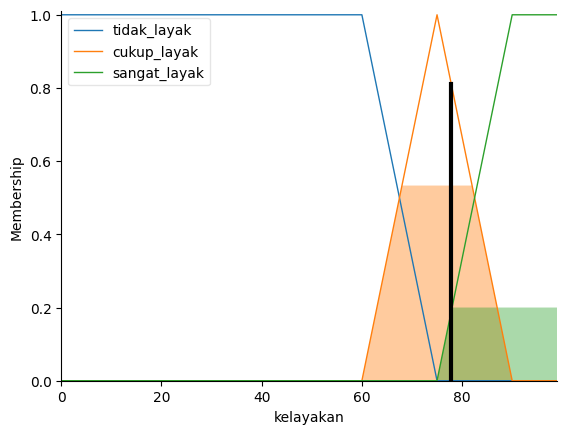

In [19]:
kelayakan.view(sim=kelayakan_simulasi)